# clase_01: EDA : Analisis Exploratorio de los Datos

## Librerias

In [4]:
#Importar paquetes de herramientas:

#Datos
import pandas as pd
import numpy as np
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')

# Dataset

El dataset  que usaremos se encuentra en:
  
https://www.kaggle.com/lava18/google-play-store-apps

Una vez descargado, le indicamos la direccion a "read_csv" para importarlo como un Pandas DataFrame.

Ademas, usaremos la funcion "np.shape()" y y el metodo ".head()" para:

* Verificar que se haya cargado bien el dataset

* Tener la dimension del dataset

* Tener una base del N° de registros para asegurarnos que en futuros filtrados, estemos haciendo las cosas bien 

In [5]:
google_df = pd.read_csv('googleplaystore.csv')

In [6]:
print(f'Shape: {np.shape(google_df)}')
google_df.head(3)

Shape: (10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up




Para saber el nombre con el que estan guardadas las columas del dataset usamos el metodo ".colums()", y si quisieramos lo podriamos guardar en una variable



In [7]:
google_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# Limpieza

En esta parte nos vamos a encargar de limpiar:

* Duplicados  --> .drop_duplicates()


* Simbolos --> apply(lambda x: x.replace('#', '') if '+' in str(x) else x)


* 'NaN' --> .dropna()


* Otros tipos de datos que no nos son utiles para trabajar --> .apply(lambda x: float(x))

#### Duplicados

In [8]:
google_df.drop_duplicates(subset='App', inplace=True,keep='first')

#### Simbolos

In [9]:
q_installs = len(google_df['Installs'].unique())
print(f'En total hay {q_installs} labels de Install\r\n')
print("\n", google_df['Installs'].unique())

En total hay 22 labels de Install


 ['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']


Podemos notar 2 simbolos de la cell anterior que debemos eliminar para poder usar el dato como numero y no como cadena de texto, y un "Free" en algun registro que esta mal cargado.

Primero vamos a quitar el "Free" y luego vamos a reemplazaar los simbolos "+" y ","

In [10]:
#Forma manual de quitar y valores que no deberiamos tener en columas
# Eliminacion manual de valores que no deberiamos tener en columas
google_df = google_df[google_df['Installs'] != 'Free']
google_df = google_df[google_df['Installs'] != 'Paid']

In [11]:
#Limpiamos el formato de algunas columnas
#Quitamos el '+', las ',' y lo pasamos a forato 'int'
google_df['Installs'] = google_df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
google_df['Installs'] = google_df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
google_df['Installs'] = google_df['Installs'].apply(lambda x: int(x))

In [12]:
q_installs = len(google_df['Installs'].unique())
print(f'En total hay {q_installs} labels de Install\r\n')
print("\n", google_df['Installs'].unique())

En total hay 20 labels de Install


 [     10000     500000    5000000   50000000     100000      50000
    1000000   10000000       5000  100000000 1000000000       1000
  500000000         50        100        500         10          1
          5          0]


En la columna "Size", tenemos problemas de unidades, en algunos casos tenemos el tamaño en "M" y en otras en "K", y para algunas aplicaciones "Varies with device", que debemos manejar de alguna manera.

En el caso de "Varies with device", vamos ademas a reemplazarlos por la media de cada categoria, para eliminar la manor cantidad de registros, aunque esta ultima tambien es una solucion, asi que proponemos que tambien la prueben.

In [13]:
#Dejamos el peso de las app en Mb y convertimos aquellas que esten en Kb.
google_df['Size'].replace('Varies with device', np.nan, inplace = True )

google_df.Size = (google_df.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             google_df.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**-3, 1]).astype(float))
#Reemplazamos aquellos registros con 'Varies with device' con la media del peso segun la categoria
google_df['Size'].fillna(google_df.groupby('Genres')['Size'].transform('mean'),inplace = True)

Links para curiosos:
   * https://docs.python.org/3/howto/regex.html (teoria)
   * https://www.geeksforgeeks.org/pattern-matching-python-regex/ (ejemplos )

In [14]:
# A float
google_df['Size'] = google_df['Size'].apply(lambda x: float(x))
google_df['Installs'] = google_df['Installs'].apply(lambda x: float(x))

In [15]:
#quitamos simbolo '$' y pasamos a float.
google_df['Price'] = google_df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
google_df['Price'] = google_df['Price'].apply(lambda x: float(x))

In [16]:
google_df['Reviews'] = google_df['Reviews'].apply(lambda x: int(x))

## NaN

Ahora verificamos que las columnas no tengan NaN, y en caso de haberlos, tendremos que decidir si son suficientes como para eliminar TODA la columa y perder esa informacion, o decidir eliminar unicamente los registros.

In [17]:
col_NaN = google_df.isnull().any()
print(col_NaN,'\r\n')
#cant_NaN = google_df.isnull().sum()
#print(cant_NaN,'\r\n')

App               False
Category          False
Rating             True
Reviews           False
Size               True
Installs          False
Type               True
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool 



In [18]:
total = google_df.isnull().sum().sort_values(ascending=False)
percent = (google_df.isnull().sum()/google_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Rating,1463,0.151465
Current Ver,8,0.000828
Size,3,0.000311
Android Ver,2,0.000207
Type,1,0.000104
Last Updated,0,0.000000


In [19]:
#Limpiamos registros
google_df.dropna(how ='any', inplace = True)

In [20]:
# Verificamos como quedo el data-set
print(f'Nos quedamos con un df de {google_df.shape[0]} filas x{google_df.shape[1]} columnas')

Nos quedamos con un df de 8187 filas x13 columnas


Ahora que terminamos con la limpieza general del Dataset, pasemos a analizar:
    
    * Rating
    * Categorias
    * Categorias vs Rating
    * Reviews
    * Precio
    
Comencemos ...

# Rating

A continuacion veamos la distribucion del Rating y su histograma

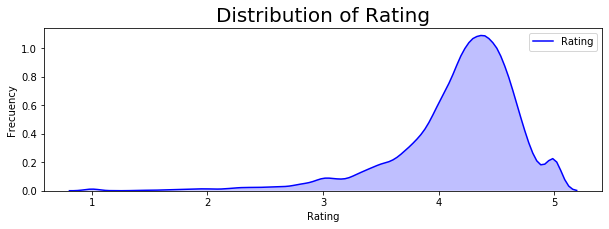

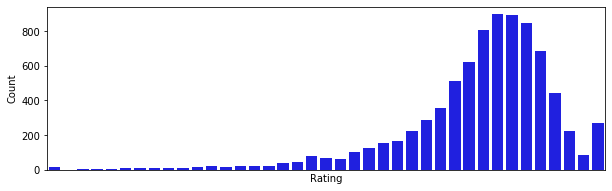

In [21]:
plt.figure(figsize=(10,3))
sns.kdeplot(google_df.Rating, color="Blue", shade = True)
plt.xlabel("Rating")
plt.ylabel("Frecuency")
plt.title('Distribution of Rating',size = 20)
plt.show()

plt.figure(figsize=(10,3))
sns.countplot(google_df.Rating, color="Blue")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks([])
plt.show()

# Categorias

A modo de ejemplo, podriamos querer saber como es el comportamiento del Rating por Categoria:
    
* Vamos a explorar como se distribuye el numero de apps por categoria
* Verifiquemos que no hay nada "raro" en los tipos de categoria (en su defecto tendriamos que hacer Limpieza aca tambien)
* Boxplot de Categoria vs Rating

In [22]:
q_categorias = len(google_df['Category'].unique())
print(f'En total hay {q_categorias} categorias\r\n')
print("\n", google_df['Category'].unique())

En total hay 33 categorias


 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


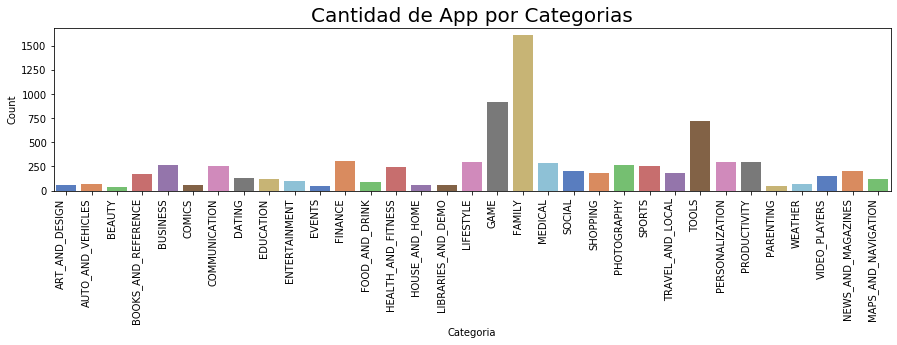

In [23]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="Category",data=google_df, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de App por Categorias',size = 20)
plt.xlabel("Categoria")
plt.ylabel("Count")
plt.show()

# Categoria vs Rating

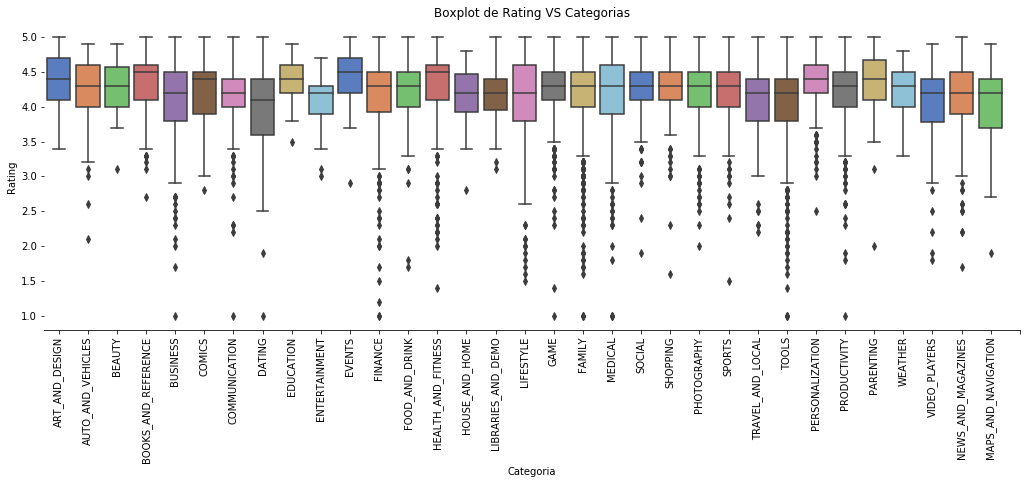

In [24]:
#Todas las categorias
g = sns.catplot(x="Category",y="Rating",data=google_df, kind="box", height = 5 ,aspect=3,palette = "muted")
g.despine(left=True) # Para quitar los el eje Y del plot
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
plt.xlabel("Categoria")
plt.ylabel("Rating")
plt.title('Boxplot de Rating VS Categorias',size = 12)
plt.show()

## Medias, atipicos y whiskers
En muchas ocaciones, luego de ver los plots vamos a querer guardar en variables valores como la media, los valores atipicos y los "whiskers" para cada categoria.

A modo de ejemplo, veamos como obtenerlos para una unica categoria.

Valores outliers:
[1.7 1.9 2.3 1.8 1.6 2.  2.  1.5 2.1 2.3 2.1]

Valor Medio:
 4.2

Limites Inferiores :
[3.8 2.6]

Limites Superiores:
[4.6 5. ]



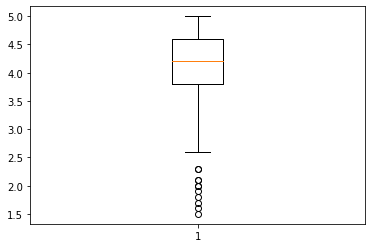

In [25]:
cat_select = 'LIFESTYLE'
df_pivot= google_df[google_df['Category']==cat_select]
plt.figure()
A = plt.boxplot(df_pivot['Rating'])
#Outliers
outliers = [flier.get_ydata() for flier in A["fliers"]]
#Media
medians = [median.get_ydata() for median in A["medians"]]
#whiskers
whiskers = [whiskers.get_ydata() for whiskers in A["whiskers"]]
print(f'Valores outliers:\r\n{outliers[0]}\r\n')
print(f'Valor Medio:\r\n {medians[0][0]}\r\n')
print(f'Limites Inferiores :\r\n{whiskers[0]}\r\n')
print(f'Limites Superiores:\r\n{whiskers[1]}\r\n')

# Reviews

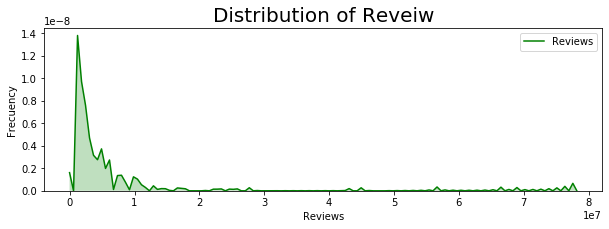

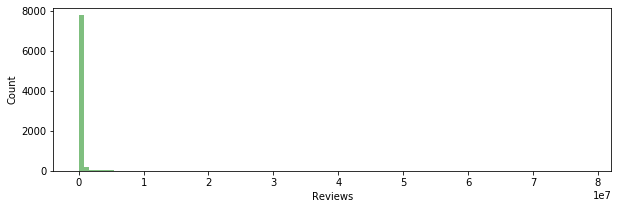

In [26]:
plt.figure(figsize=(10,3))
g = sns.kdeplot(google_df.Reviews, color="Green", shade = True)
plt.xlabel("Reviews")
plt.ylabel("Frecuency")
plt.title('Distribution of Reveiw',size = 20)
plt.show()
plt.figure(figsize=(10,3))
plt.hist(google_df.Reviews, bins=100,color='g' ,alpha=0.5)
plt.xlabel("Reviews")
plt.ylabel("Count")
plt.show()

Este ultimo grafico nos da alguna informacion?

Muchas veces los graficos parecen que no nos muestran nada.

En los casos donde tenemos muchas informacion concentrada, una buena practica es hacer un cambio de escala.

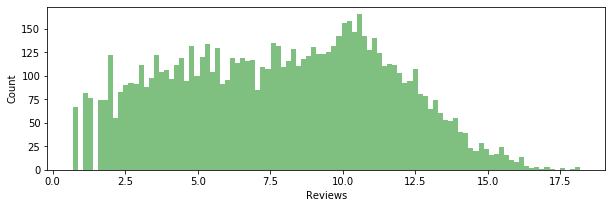

In [27]:
plt.figure(figsize=(10,3))
plt.hist(np.log(1+google_df.Reviews), bins=100,color='g' ,alpha=0.5)
plt.xlabel("Reviews")
plt.ylabel("Count")
plt.show()

Ahora podemos ver mejor como se distribuyen las cantidades de reviews ...

Alla en el fondo, donde antes no veiamos nada, ahora podemos ver que hay un par de apps con muchisimos reviews...
veamos cuales son ...

In [25]:
google_df[google_df.Reviews > 5000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,59.185124,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,59.185124,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,59.185124,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,59.185124,5.000000e+08,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
351,Opera Mini - fast web browser,COMMUNICATION,4.5,5149854,59.185124,1.000000e+08,Free,0.0,Everyone,Communication,"July 19, 2018",Varies with device,Varies with device


**Habra alguna relacion entre los "Reviews" y alguna otra variable?**

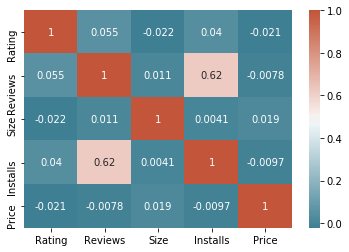

In [26]:
corrmat = google_df.corr()
#f, ax = plt.subplots()
p =sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

**Tiene sentido?**

# Precio

Tenemos a nuestra disposicion tambien los precios de las Apps, asi que vamos a usarlos!

* Estadistica descriptiva sencilla que nos da ".describe()" y si algo nos llama la atencion, explorarlo y si hace falta corregirlo.

* Vamos a armar a nuestro gusto las bandas de precios de apps.

* Verificaremos que tienen sentido las bandas que armamos

* Crucemos informacion entre Precio y Rating, y saquemos conclusiones

In [31]:
google_df['Price'].describe()

count    8187.000000
mean        1.038722
std        16.867118
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

Hay una app que cuesta u$d 400 ! !

In [32]:
google_df[google_df['Price'] == 400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000.0,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


Ahora armemos a nuestro gusto brands segun los precios y veamos como se distribuyen

In [33]:
#Bandas
google_df.loc[ google_df['Price'] == 0, 'PriceBand'] = '0 Free'
google_df.loc[(google_df['Price'] > 0) & (google_df['Price'] <= 0.99), 'PriceBand'] = '1 Muy Barato'
google_df.loc[(google_df['Price'] > 0.99) & (google_df['Price'] <= 2.99), 'PriceBand']   = '2 Barato'
google_df.loc[(google_df['Price'] > 2.99) & (google_df['Price'] <= 4.99), 'PriceBand']   = '3 Normal'
google_df.loc[(google_df['Price'] > 4.99) & (google_df['Price'] <= 14.99), 'PriceBand']   = '4 Caro'
google_df.loc[(google_df['Price'] > 14.99) & (google_df['Price'] <= 29.99), 'PriceBand']   = '5 Muy Caro'
google_df.loc[(google_df['Price'] > 29.99), 'PriceBand']  = '6 #VamoACalmarnos'

In [34]:
#Veamos como es el mean value para las bandas que definimos
google_df[['PriceBand', 'Rating']].groupby(['PriceBand'], as_index=False).mean()

,PriceBand,Rating
0,0 Free,4.166394
1,1 Muy Barato,4.300971
2,2 Barato,4.293220
3,3 Normal,4.237838
4,4 Caro,4.235897
5,5 Muy Caro,4.238889
6,6 #VamoACalmarnos,3.910526


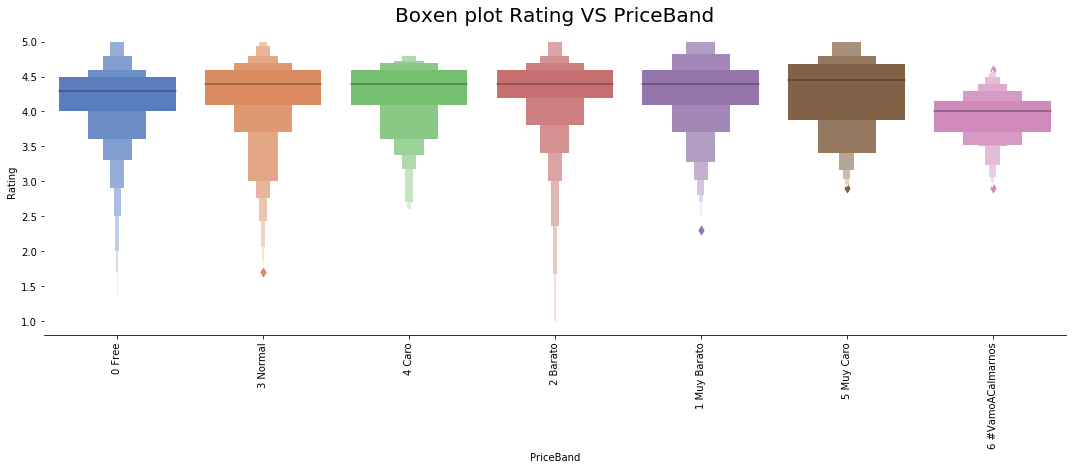

In [35]:
g = sns.catplot(x="PriceBand",y="Rating",data=google_df, kind="boxen", height = 5,aspect=3 ,palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxen plot Rating VS PriceBand',size = 20)
plt.show()

Para bases de datos muy grandes, muchas veces los limites de confiabilidad del boxplot consideran erroneamente "outliers" a muestras con muy baja probabilidad, que si deberian considerarse como parte del espacio de muestra.

Ademas, el "boxplot" no nos deja visualizar como se distribuyen las muestras en las tails.

Si creemos que alguno de estos factores, entre otros, nos puede estar sucediendo y nos "tapa" informacion, lo mejor es probar con algun otro tipo de ploteo ("boxen"[1] o  "violin") y analizarlo.

[1] https://vita.had.co.nz/papers/letter-value-plot.pdf

# Propuestas:
    
    - Apps Pagas vs Apps Free
    
    - Content Rating (Everyone, Teen, +18, etc)
         Hint: google_df['Genres'] = google_df['Genres'].str.split(';').str[0]
         
    - Genres vs Rating
    
    - Genres (Estadistica descriptiva w.r.t , i.e, "Rating")
    
    - Mismo analisis, pero en vez de reemplazar Varies with device por la media w.r.t. "categoria", eliminando los registros y ver si el supuesto que hicimos impacta en las conclusiones. 